# 2. Data Understanding

## 2.1.1 Persiapan Data dan koneksi ke Python

Ada dua cara untuk membaca dataset, tergantung dimana letak dataset:
a. Jika data di local hard drive
b. Jika data di cloud: Google Drive, jika menggunakan Google Colaboratory

In [0]:
# Import Library
import pandas as pd #panda untuk data set
import numpy as np #untuk perhitungan statistik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi juga menggunakan library seaborn

### 2.1.1.a Data di local hard drive

Jika data kita dalam bentuk excel atau csv file di local hard drive

In [0]:
# Untuk load data di local hard drive
import os
os.getcwd()

'/Users/indralukastjahaja/Downloads'

### 2.1.1.b Cloud: Google Drive, jika menggunakan Google Colaboratory

Jika data kita terletak di Google Drive, maka kita harus menghubungkan koneksi dengan akun Google kita masing-masing.

In [2]:
# Buka URL dan beri akses kepada Google Drive. Kopi authorization code dan tekan Enter.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Kopi file: Pada bagian ini kita akan mengopi file data yang akan kita gunakan ke google drive kita. Kopi file excel Credit_Scoring_Dataset ke Google Drive anda
import os
print(os.getcwd())

# Untuk melihat isi dari folder
print(os.listdir('.'))

# Merubah folder: Berikutnya kita akan merubah folder Google Colaboratory ke folder yang memiliki dataset yang akan kita gunakan
os.chdir('/content/gdrive/My Drive/Credit Scoring Modeling/')

/content
['.config', 'gdrive', 'sample_data']


In [0]:
# Install library berkaitan untuk Google Drive
!pip install -q shap
!pip install -q scorecardpy
!pip install -q scikit-plot

## 2.1.2 Import Library Coding

In [0]:
# Import Library
import pandas as pd #panda untuk data set
import numpy as np #untuk perhitungan statistik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi juga menggunakan library seaborn

## 2.1.3 Import Dataset

In [0]:
# Coding formula
# df_raw = pd.INPUT1('FILE LOCATION')
df_raw = pd.read_excel('Credit_Scoring_Dataset.xlsx',sheet_name = 'data')

## 2.1.4 Struktur Data dan Preview

In [6]:
# Informasi detil mengenai data
# print(df_raw.INPUT1)
print(df_raw.info())

# Preview Data
# print(df_raw.INPUT1)
print(df_raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 12 columns):
X                            12500 non-null int64
SLIK_total_limit             12491 non-null float64
SLIK_pembayaran_per_limit    12499 non-null float64
SLIK_tagihan                 12495 non-null float64
pendapatan                   12498 non-null float64
target_default               12500 non-null int64
umur                         12492 non-null float64
gender                       12491 non-null object
status_rumah                 12499 non-null float64
jumlah_tanggungan            12500 non-null int64
kelas_pekerjaan              12500 non-null int64
status_tabungan              12478 non-null object
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB
None
   X  SLIK_total_limit  ...  kelas_pekerjaan  status_tabungan
0  1         7000000.0  ...                1             high
1  2        10000000.0  ...                1             high
2  3        29000000.0  

## 2.1.5 Mengubah Tipe Data

In [0]:
# Mengubah variabel target_default dan kelas pekerjaan dari numerik ke string
# df_raw['INPUT1'] = df_raw['INPUT1'].astype(str)

df_raw['target_default'] = df_raw['target_default'].astype(str)
df_raw['kelas_pekerjaan'] = df_raw['kelas_pekerjaan'].astype(str)

## 2.2.2 Cek Data Kosong

In [8]:
# Info dataset
df_raw.info() 

df_raw.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 12 columns):
X                            12500 non-null int64
SLIK_total_limit             12491 non-null float64
SLIK_pembayaran_per_limit    12499 non-null float64
SLIK_tagihan                 12495 non-null float64
pendapatan                   12498 non-null float64
target_default               12500 non-null object
umur                         12492 non-null float64
gender                       12491 non-null object
status_rumah                 12499 non-null float64
jumlah_tanggungan            12500 non-null int64
kelas_pekerjaan              12500 non-null object
status_tabungan              12478 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


X                             0
SLIK_total_limit              9
SLIK_pembayaran_per_limit     1
SLIK_tagihan                  5
pendapatan                    2
target_default                0
umur                          8
gender                        9
status_rumah                  1
jumlah_tanggungan             0
kelas_pekerjaan               0
status_tabungan              22
dtype: int64

## 2.3.1 Eksplorasi Variabel Numerik

In [9]:
df_raw.describe()

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,umur,status_rumah,jumlah_tanggungan
count,12500.000000,1.249100e+04,1.249900e+04,1.249500e+04,1.249800e+04,12492.000000,12499.000000,12500.000000
mean,6250.500000,2.150268e+07,1.919605e+07,1.222110e+07,2.838598e+07,27.200208,0.715737,3.558720
std,3608.583517,3.056182e+07,3.958466e+08,2.593114e+07,4.595056e+07,10.112862,0.728070,1.705821
min,1.000000,3.000000e+06,-1.251600e+09,0.000000e+00,2.000000e+06,18.000000,0.000000,0.000000
25%,3125.750000,5.000000e+06,0.000000e+00,2.100000e+06,5.000000e+06,20.000000,0.000000,2.000000
50%,6250.500000,9.000000e+06,2.970000e+06,4.950000e+06,1.100000e+07,23.000000,1.000000,3.000000
75%,9375.250000,2.300000e+07,1.007000e+07,1.120000e+07,3.100000e+07,30.000000,1.000000,5.000000
max,12500.000000,1.050000e+09,3.387780e+10,8.452500e+08,1.559000e+09,60.000000,3.000000,8.000000


## 2.3.2 Eksplorasi Variabel Teks/Kategori

In [10]:
# melihat statistika dari variabel teks / kategori

print(df_raw['status_tabungan'].value_counts())

little      8102
high        2723
moderate    1653
Name: status_tabungan, dtype: int64


## 2.3.3 Eksplorasi Data Teks/Kategori (Presentase)

In [11]:
print(df_raw['target_default'].value_counts(normalize=True))

0    0.90936
1    0.09064
Name: target_default, dtype: float64


## 2.4.1 Distribusi Data Numerik

Text(0.5, 1.0, 'Distribution Plot of Pendapatan')

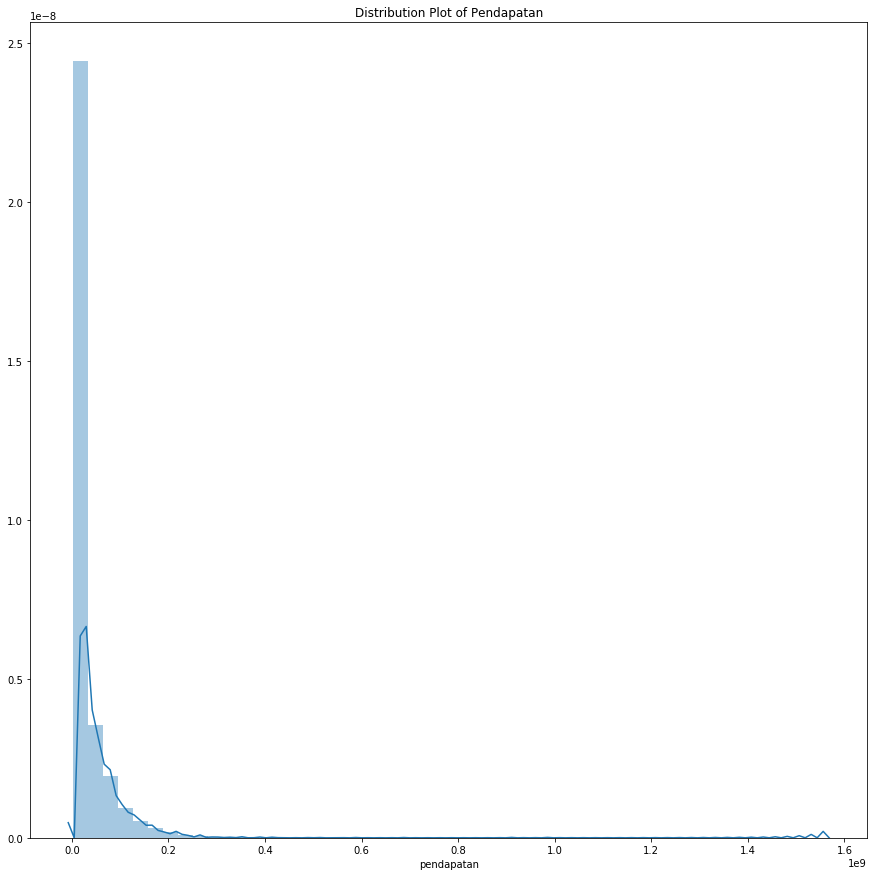

In [12]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.distplot(df_raw['pendapatan'].dropna(), ax=ax).set_title('Distribution Plot of Pendapatan')

## 2.5.3 Boxplot Coding

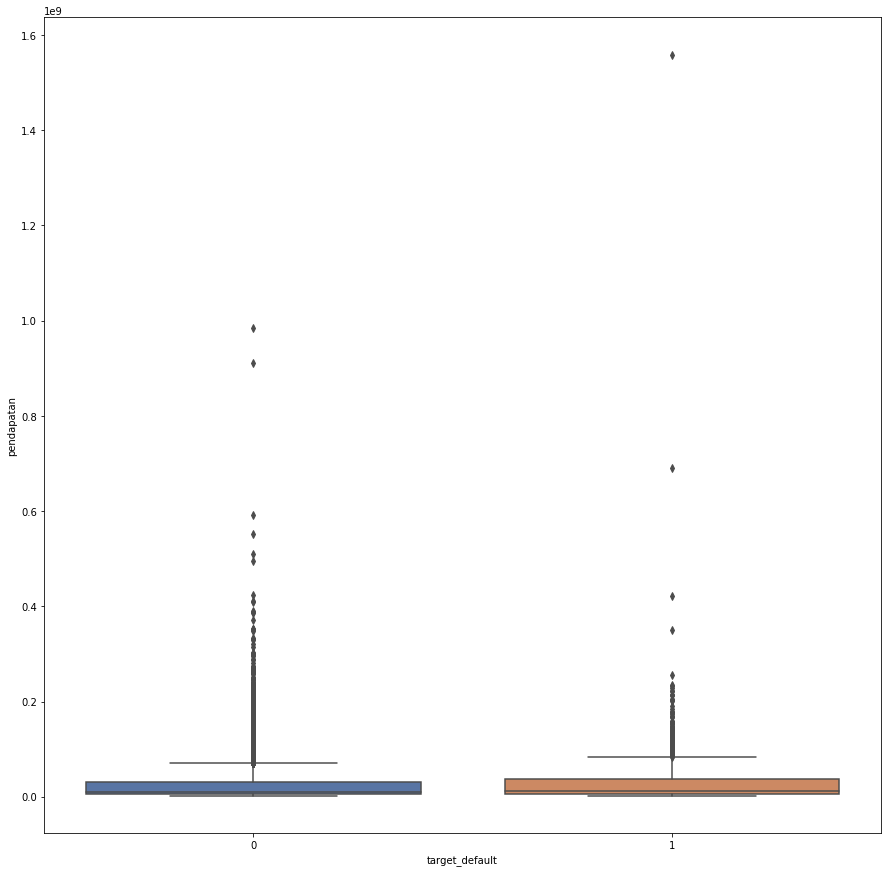

In [13]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.set(style="whitegrid")
ax = sns.boxplot(y=df_raw["pendapatan"],x = df_raw['target_default'])

## 2.5.4 Boxplot Lanjutan Coding

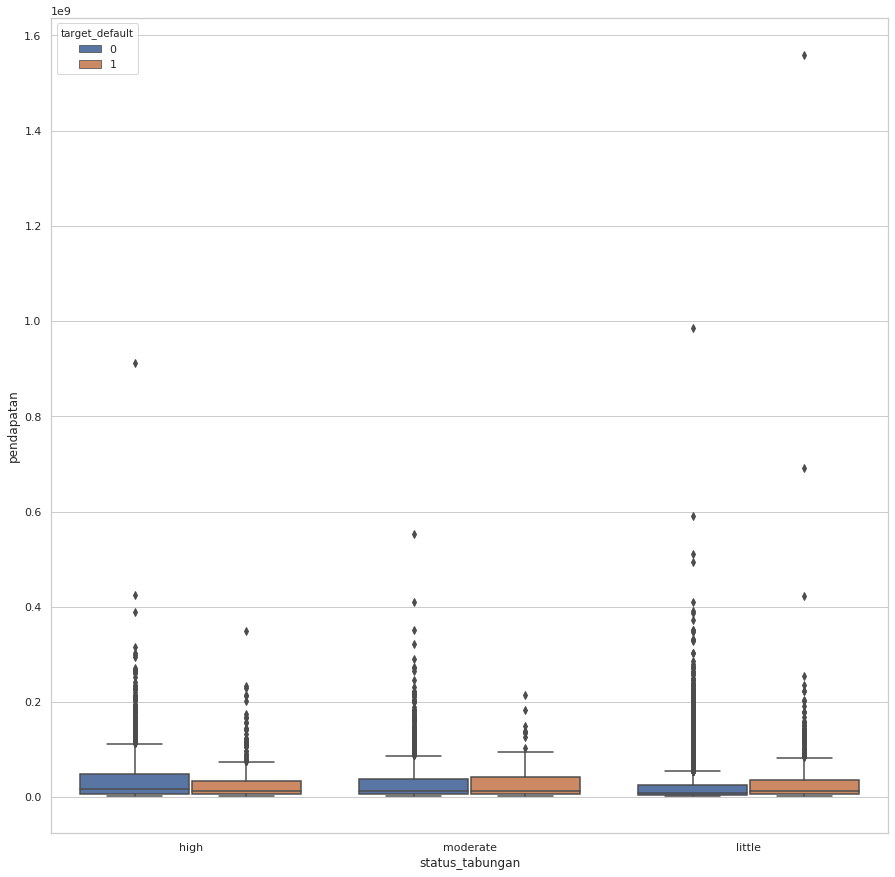

In [14]:
# Variasi box plot dengan menggunakan dua variabel
# Cobalah kombinasi lainnya
fig, ax = plt.subplots(figsize=(15,15)) 
sns.set(style="whitegrid")
ax = sns.boxplot(y=df_raw["pendapatan"],x = df_raw['status_tabungan'], hue = df_raw['target_default'])

## 2.5.5 Scatter Plot

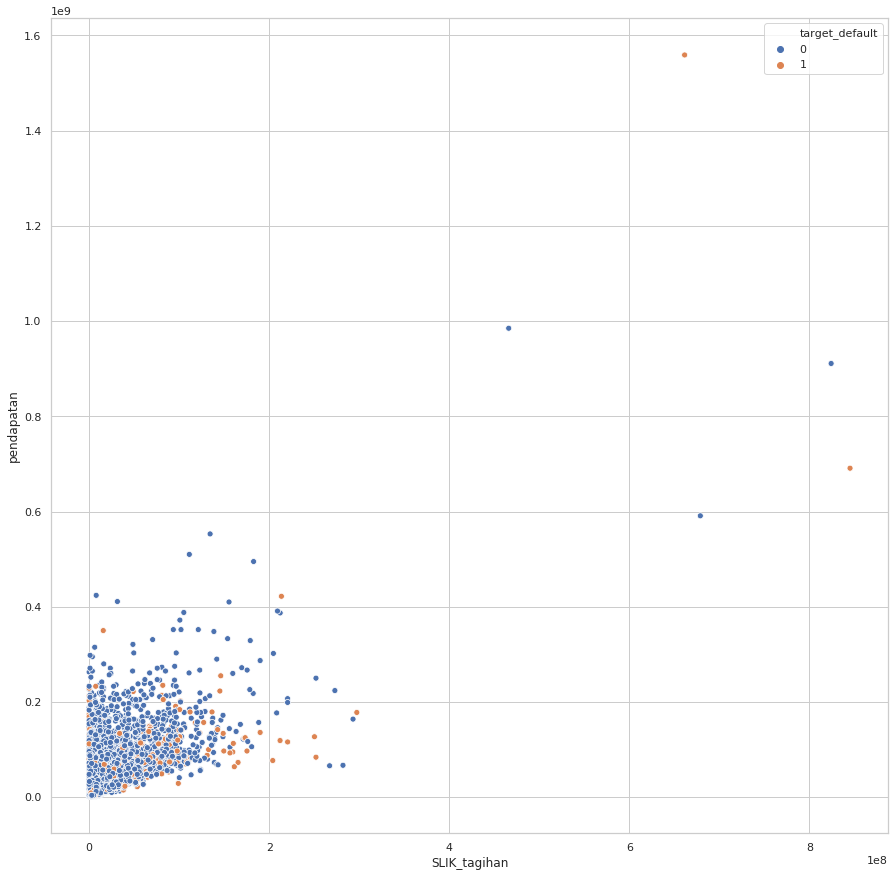

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.scatterplot(x='SLIK_tagihan',y='pendapatan',hue = 'target_default',data=df_raw)

## 2.5.6 Distribusi Data per Variabel

In [16]:
print(df_raw['pendapatan'].describe([.01,.05,.25,.50,.75,.95,.99] ))

count    1.249800e+04
mean     2.838598e+07
std      4.595056e+07
min      2.000000e+06
1%       2.000000e+06
5%       2.000000e+06
25%      5.000000e+06
50%      1.100000e+07
75%      3.100000e+07
95%      1.120000e+08
99%      2.040300e+08
max      1.559000e+09
Name: pendapatan, dtype: float64


## 2.6.2 Analisa Statistik Antar Variabel

In [17]:
# Gunakan crosstab untuk melihat jumlah data pria/wanita dan pailitnya
pd.crosstab(df_raw['status_tabungan'], df_raw['target_default'])

# Crosstab secara persentase
pd.crosstab(df_raw['status_tabungan'], df_raw['target_default'], normalize='index')

target_default,0,1
status_tabungan,,
high,0.876239,0.123761
little,0.913231,0.086769
moderate,0.946158,0.053842


In [18]:
print(df_raw[df_raw['target_default']=='0'].describe())

                  X  SLIK_total_limit  ...  status_rumah  jumlah_tanggungan
count  11367.000000      1.135800e+04  ...  11367.000000        11367.00000
mean    6248.937538      2.120373e+07  ...      0.712853            3.54755
std     3599.164353      2.877774e+07  ...      0.727453            1.70342
min        1.000000      3.000000e+06  ...      0.000000            0.00000
25%     3124.500000      5.000000e+06  ...      0.000000            2.00000
50%     6269.000000      9.000000e+06  ...      1.000000            3.00000
75%     9362.500000      2.300000e+07  ...      1.000000            5.00000
max    12500.000000      5.250000e+08  ...      3.000000            8.00000

[8 rows x 8 columns]


## 2.7.1 Korelasi Antara Dua Variabel

In [19]:
# korelasi antara dua variabel
df_raw['pendapatan'].corr(df_raw['target_default'].astype(int))

0.02932208514920928

## 2.7.3 Heatmap korelasi

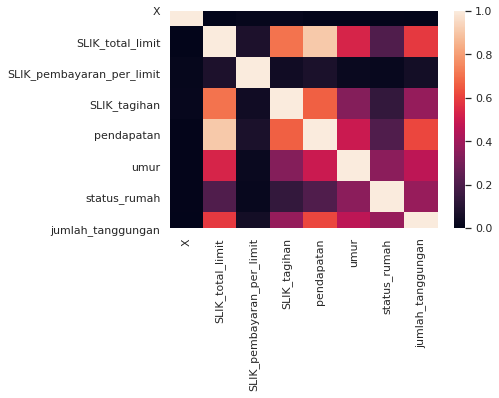

In [20]:
import seaborn as sns
corr = df_raw.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 2.8.2 Statistik Inferensial 

In [21]:
from scipy import stats
stats.ttest_ind( df_raw[df_raw.target_default == '0' ].pendapatan,
                 df_raw[df_raw.target_default == '1' ].pendapatan, nan_policy='omit')

Ttest_indResult(statistic=-3.279194214019225, pvalue=0.0010438865421792786)

# 3. Data Preparation

## 3.1.2 Coding untuk import libraries

In [22]:
import pandas as pd #panda untuk data set
import numpy as np #untuk perhitungan statistik

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set dataframe dari df_raw menjadi df_prepare
df_prepare = df_raw

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 3.1.3 Menangani Data Kosong

In [0]:
# Untuk function nya silahkan gunakan koding berikut:
# Koding berikut akan missing value dari semua variabel dengan nilai yang paling sering muncul (mode)

for column in df_prepare.columns:
        df_prepare[column].fillna(df_prepare[column].mode()[0], inplace=True)

## 3.2.2 Feature Engineering - Rasio Utilitas

In [0]:
df_prepare['rasio_utilitas'] = df_prepare['SLIK_tagihan'] / df_prepare['SLIK_total_limit']

## 3.2.2 Feature Engineering - Rasio Pembayaran

In [0]:
df_prepare['rasio_pembayaran'] = df_prepare['SLIK_pembayaran_per_limit'] / df_prepare['SLIK_tagihan']

## 3.2.3 Mengatasi Missing Value

In [26]:
# Cek apakah ada nilai N/A atau missing value
df_prepare.isnull().values.any()

# Akan ada infinte value karena terjadi pembagian dengan 0, nilai infinite kita ganti dengan 0
df_prepare['rasio_pembayaran'] = df_prepare['rasio_pembayaran'].replace(np.inf,0)

# Ubah nilai NaN menjadi 0
df_prepare['rasio_pembayaran'].fillna(0, inplace=True)

# cek apakah masih ada N/A atau missing value
df_prepare.isnull().values.any() 
# atau
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 14 columns):
X                            12500 non-null int64
SLIK_total_limit             12500 non-null float64
SLIK_pembayaran_per_limit    12500 non-null float64
SLIK_tagihan                 12500 non-null float64
pendapatan                   12500 non-null float64
target_default               12500 non-null object
umur                         12500 non-null float64
gender                       12500 non-null object
status_rumah                 12500 non-null float64
jumlah_tanggungan            12500 non-null int64
kelas_pekerjaan              12500 non-null object
status_tabungan              12500 non-null object
rasio_utilitas               12500 non-null float64
rasio_pembayaran             12500 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.3+ MB


## 3.3.2 Tahapan One-hot Encoding

In [27]:
# Pada bagian ini kita akan belajar melakukan one hot encoding untuk semua variabel kategori

# Langkah pertama adalah memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_prepare.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_prepare.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_prepare['target_default']
dataset_dummies.drop(['target_default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 3.3.3 Persiapan Sebelum Data Preparation

In [28]:
# Persiapan sebelum melakukan data preparation lainnya.

# Pada bagian ini kita mempersiapkan dataset kita dengan memastikan tidak ada nilai yang missing ataupun nilai yang aneh (seperti infinity dan missing value)
df_encoded[df_encoded==np.inf]=np.nan
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Jangan lupa juga untuk exclude variabel X yang sebenarnya hanyalah index nasabah saja
df_encoded.drop(['X'], axis = 1, inplace = True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 16 columns):
gender_M                     12500 non-null uint8
kelas_pekerjaan_2            12500 non-null uint8
kelas_pekerjaan_3            12500 non-null uint8
kelas_pekerjaan_4            12500 non-null uint8
status_tabungan_little       12500 non-null uint8
status_tabungan_moderate     12500 non-null uint8
SLIK_total_limit             12500 non-null float64
SLIK_pembayaran_per_limit    12500 non-null float64
SLIK_tagihan                 12500 non-null float64
pendapatan                   12500 non-null float64
umur                         12500 non-null float64
status_rumah                 12500 non-null float64
jumlah_tanggungan            12500 non-null int64
rasio_utilitas               12500 non-null float64
rasio_pembayaran             12500 non-null float64
target_default               12500 non-null object
dtypes: float64(8), int64(1), object(1), uint8(6)
memory usage: 1.0+ MB


## 3.4.2 Imbalance Data Coding

In [0]:
# Menentukan variabel dependent dan independent, diperlukan untuk input function SMOTE

# X sebagai semua variabel independent, input untuk model
X = df_encoded.iloc[:,0:len(df_encoded.columns)-1]

# y sebagai target atau variabel dependent
y = df_encoded.iloc[:,len(df_encoded.columns)-1]

# menggunakan function SMOTE untuk melakukan kombinasi oversampling/undersampling

# function SMOTE dengan menerapkan rasio 20% atau 0.2
sm = SMOTE(random_state = 42, ratio = 0.2)

# Hasil dari function SMOTE disimpan dalam variabel X dan y
X_imbal,y_imbal = sm.fit_sample(X,y.ravel())

## 3.5.2 Scaling Data Set

In [0]:
# Untuk contoh, kita akan menggunakan standard scaler dari library sklearn

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X menjadi standardisation
X_scale = sc.fit_transform(X_imbal)

## 3.5.3 Split Training dan Testing Coding

In [0]:
# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_imbal, test_size =0.3)

# Membagi lagi test data set menjadi dua, dimana 15% adalah test dan 15% digunakan sebagai validasi
X_test, X_test_holdup, y_test, y_test_holdup = train_test_split(X_test, y_test, test_size =0.5)

# Karena X_train dalam bentuk array, tidak akan tersimpan nama variabel independen. Oleh karena itu kita akan simpan dalam bentuk list nama-nama kolom
kolom =["gender_M","kelas_pekerjaan_2","kelas_pekerjaan_3","kelas_pekerjaan_4","status_tabungan_little","status_tabungan_moderate","SLIK_total_limit","SLIK_pembayaran_per_limit","SLIK_tagihan","pendapatan","umur","status_rumah","jumlah_tanggungan","rasio_utilitas","rasio_pembayaran"]

# 4. Modeling

## 4.2.2 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

# Pembuatan model logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Hasil dari model: parameter koefisien
parameters = log_reg.coef_
print(kolom)
print(parameters)

['gender_M', 'kelas_pekerjaan_2', 'kelas_pekerjaan_3', 'kelas_pekerjaan_4', 'status_tabungan_little', 'status_tabungan_moderate', 'SLIK_total_limit', 'SLIK_pembayaran_per_limit', 'SLIK_tagihan', 'pendapatan', 'umur', 'status_rumah', 'jumlah_tanggungan', 'rasio_utilitas', 'rasio_pembayaran']
[[-0.02966939  0.01913171 -0.03303898 -0.04927689 -0.62814269 -0.42385728
   0.11494542 -6.44397484  0.26787868 -0.10575821  0.01264642  0.08612485
  -0.02161165  0.41303945  0.13275555]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4.2.3 Parameter Tuning Coding

In [33]:
from sklearn.feature_selection import RFE

# membuat model RFE dan memilih variabel independen terbaik
rfe = RFE(log_reg)
rfe = rfe.fit(X_train, y_train)

# hasil variabel independen yang digunakan
rfe_result = rfe.support_.tolist()
kolom_result = [x for x, y in zip(kolom, rfe_result) if y == True]
print(kolom_result)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

['status_tabungan_little', 'status_tabungan_moderate', 'SLIK_total_limit', 'SLIK_pembayaran_per_limit', 'SLIK_tagihan', 'rasio_utilitas', 'rasio_pembayaran']


## 4.3.2 Decision Tree Coding

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 10, 
                                    min_samples_split = 0.1, min_samples_leaf=0.1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## 4.3.3 Decision Tree: Parameter Tuning

In [35]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

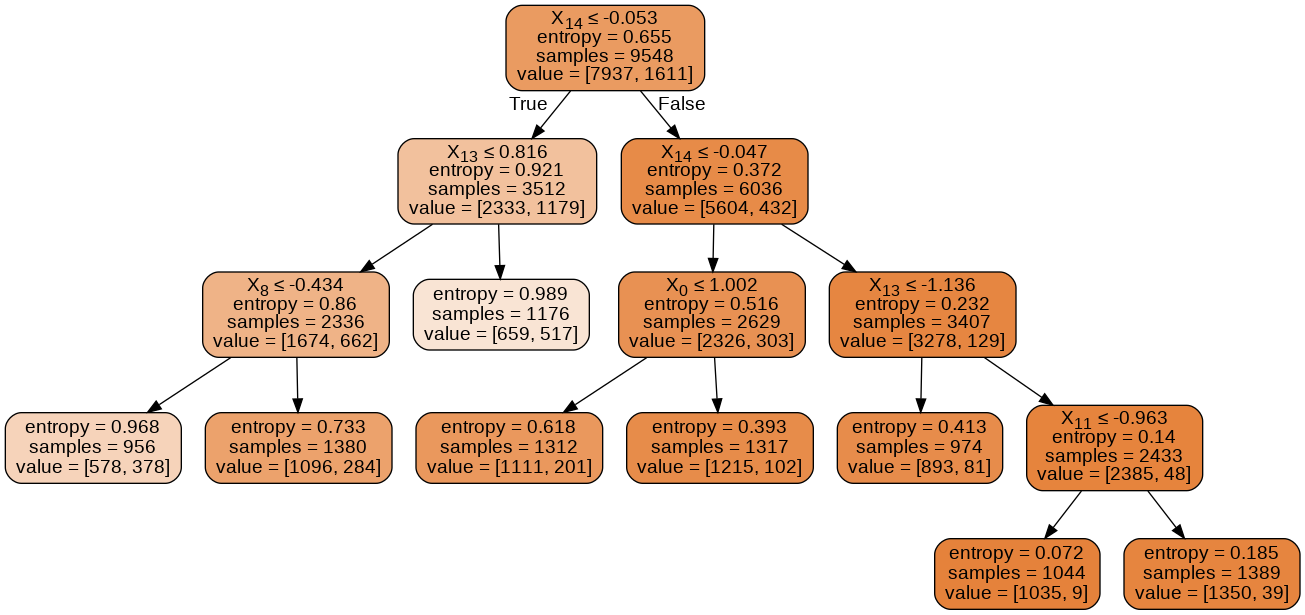

In [36]:
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from sklearn.externals.six import StringIO 

# Untuk dapat menggunakan graphviz memerlukan instalasi library yang tepat, silahkan refer ke website berikut untuk petunjuk instalasi:
# https://stackoverflow.com/questions/27666846/pydot-invocationexception-graphvizs-executables-not-found

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.4.2 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## 4.4.3 Random Forest: Parameter Tuning

In [38]:
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0,
                                   max_features = 'auto', max_depth = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## 4.4.4 Interpretasi Hasil Random Forest

Text(0.5, 0, 'Relative Importance')

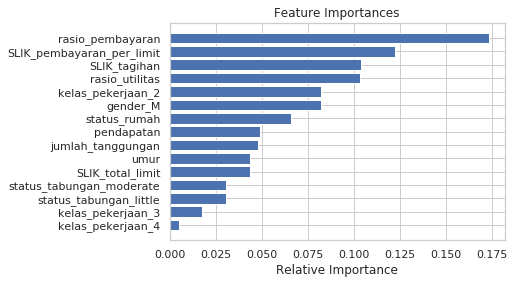

In [39]:
importances = classifier.feature_importances_
indices = np.argsort(importances)
features = df_encoded.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Feature importance ini dapat menggambarkan variable mana yang paling berpengaruh dalam menentukan gagal nya seseorang membayar kredit atau tidak

## 4.5.2 xGB Coding dan Interpretasi

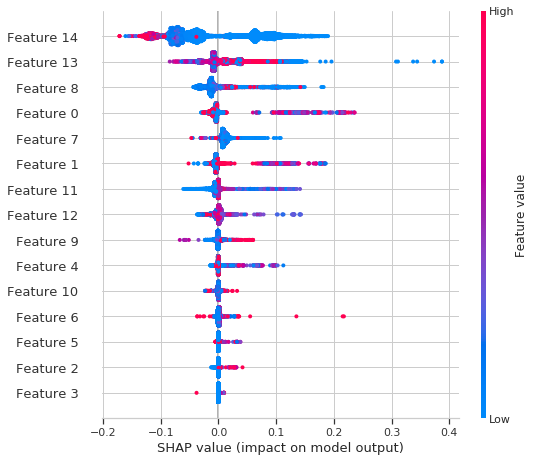

In [42]:
import xgboost

classifier = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

import shap
import numpy.core.multiarray

shap.initjs()

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_train)

# Rangkuman hasil analisa dari semua variabel
shap.summary_plot(shap_values, X_train)

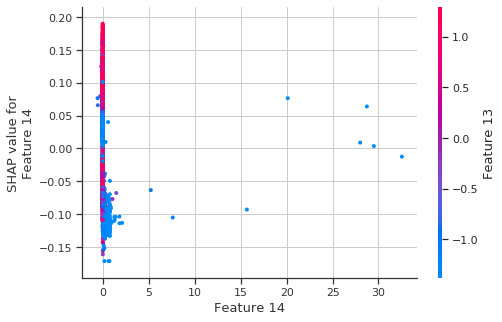

In [43]:
# Membuat visualisasi SHAP dependence plot untuk melihat hasil dari satu variabel ke seluruh dataset
shap.dependence_plot("Feature 14", shap_values, X_train)

## 4.6.2 Scorecard Import dan Preparation

In [46]:
import scorecardpy as sc

# data prepare ------
# scorecardpy library memiliki fungsi untuk data split, scale, dan juga lainnya, oleh karena itu kita akan load df_prepare saja
dat = df_prepare

# filter variabel secara otomotis
# filter otomatis variabel dari fungsi scorecard, dengan tidak mengikutsertakan variabel yang terlalu banyak missing value dan nilai minimum Information Value
dt_s = sc.var_filter(dat, y="target_default")

[INFO] filtering variables ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:113: UserWarning: The positive value in "target_default" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


Variable filtering on 12500 rows and 14 columns in 00:00:28 
5 variables are removed


## 4.6.4 Cara Membaca Hasil WoE Bins

[INFO] creating woe binning ...
Binning on 12500 rows and 9 columns in 00:00:11
{'SLIK_total_limit':            variable                      bin  ...      breaks  is_special_values
0  SLIK_total_limit         [-inf,6000000.0)  ...   6000000.0              False
1  SLIK_total_limit   [6000000.0,10000000.0)  ...  10000000.0              False
2  SLIK_total_limit  [10000000.0,14000000.0)  ...  14000000.0              False
3  SLIK_total_limit  [14000000.0,20000000.0)  ...  20000000.0              False
4  SLIK_total_limit         [20000000.0,inf)  ...         inf              False

[5 rows x 12 columns], 'rasio_pembayaran':            variable         bin  count  ...  total_iv  breaks  is_special_values
0  rasio_pembayaran  [-inf,1.0)   7765  ...  0.743145     1.0              False
1  rasio_pembayaran   [1.0,8.0)   3415  ...  0.743145     8.0              False
2  rasio_pembayaran   [8.0,inf)   1320  ...  0.743145     inf              False

[3 rows x 12 columns], 'SLIK_tagihan':      

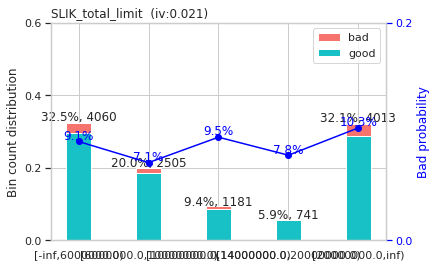

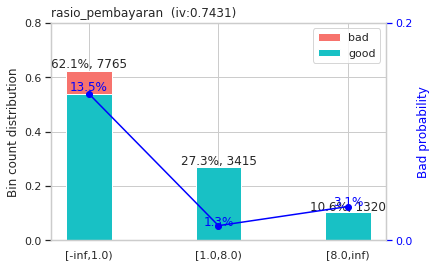

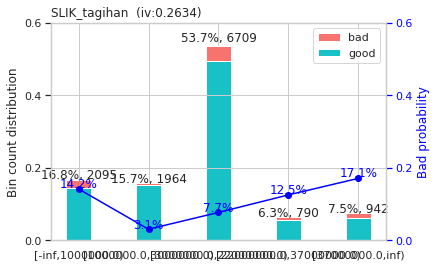

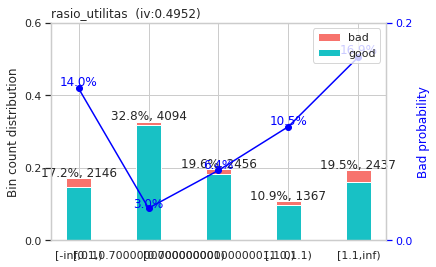

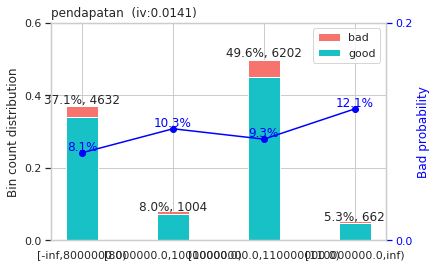

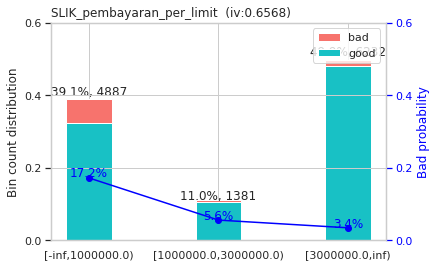

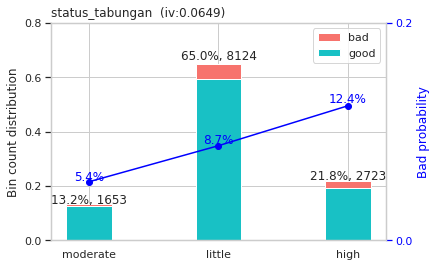

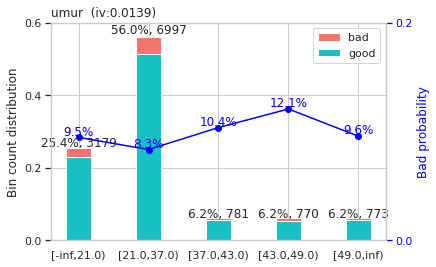

In [48]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'target_default').values()

# woe binning ------
bins = sc.woebin(dt_s, y="target_default")

# Melihat plot hasil dari WoE dan IV
sc.woebin_plot(bins)

# Hasil dari WoE dan IV secara kalkulasi
print(bins)

## 4.6.5 Pembuatan Scorecard dengan Logistic Regression

In [49]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

y_train = train_woe.loc[:,'target_default']
X_train = train_woe.loc[:,train_woe.columns != 'target_default']
y_test = test_woe.loc[:,'target_default']
X_test = test_woe.loc[:,train_woe.columns != 'target_default']

# membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

[INFO] converting into woe values ...
[INFO] converting into woe values ...


## 4.6.6 Evaluasi Kinerja Model Scorecard

/usr/local/lib/python3.6/dist-packages/scorecardpy/perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


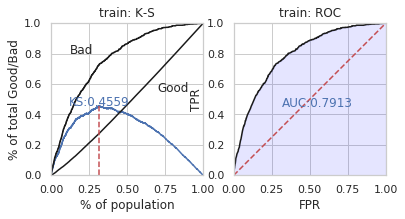

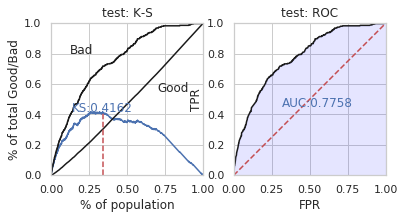

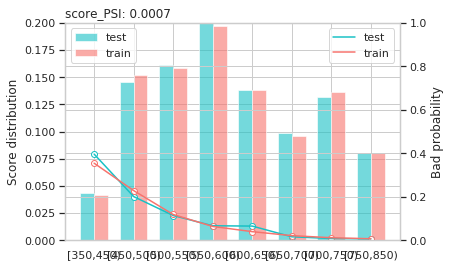

{'basepoints':      variable  bin  points
0  basepoints  NaN   556.0, 'SLIK_total_limit':            variable                      bin  points
0  SLIK_total_limit         [-inf,6000000.0)    -0.0
1  SLIK_total_limit   [6000000.0,10000000.0)    11.0
2  SLIK_total_limit  [10000000.0,14000000.0)    -2.0
3  SLIK_total_limit  [14000000.0,20000000.0)     7.0
4  SLIK_total_limit         [20000000.0,inf)    -6.0, 'rasio_pembayaran':            variable         bin  points
5  rasio_pembayaran  [-inf,1.0)   -14.0
6  rasio_pembayaran   [1.0,8.0)    63.0
7  rasio_pembayaran   [8.0,inf)    36.0, 'SLIK_tagihan':         variable                      bin  points
8   SLIK_tagihan         [-inf,1000000.0)   -24.0
9   SLIK_tagihan    [1000000.0,3000000.0)    54.0
10  SLIK_tagihan   [3000000.0,22000000.0)     8.0
11  SLIK_tagihan  [22000000.0,37000000.0)   -17.0
12  SLIK_tagihan         [37000000.0,inf)   -34.0, 'rasio_utilitas':           variable                       bin  points
13  rasio_utilitas    

In [50]:
# Evaluasi model dengan K-S dan ROC
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# scorecard membuat scorecard berdasarkan hasil dari WoE grup bin dan model logistic
card = sc.scorecard(bins, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# Population Stability Index (PSI)
# Kalkukasi PSI untuk model credit score dan membuat grafik
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Hasil dari scorecard adalah
print(card)

# 5. Implementasi dan Evaluasi

## 5.1.2 Implementasi Model Coding

In [51]:
# Ingat di Bab III: Data Preparation, dimana kita membedakan data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

# Di Bab IV: Modeling, kita telah membuat model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Di bagian ini kita akan menggunakan model tersebut untuk memprediksi data test
predicted = classifier.predict(X_test)
predicted_proba = classifier.predict_proba(X_test)

# Melihat hasil probabilitas prediksi
print(predicted_proba)

[[0.9 0.1]
 [0.7 0.3]
 [0.9 0.1]
 ...
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]]


## 5.2.2 Confusion Matrix: Coding

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Ingat di topic III: Data Preparation, dimana kita membedakan data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

# Di topic IV: Modeling, kita telah membuat model
from sklearn.tree import DecisionTreeClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Di bagian ini kita akan menggunakan model tersebut untuk memprediksi data test
predicted = classifier.predict(X_test)
predicted_proba = classifier.predict_proba(X_test)

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
matrix = confusion_matrix(y_test, predicted)

# cek hasil matrix
print(matrix)

[[3338   46]
 [ 338   28]]


## 5.3.1 Classification Penjelasan dan Coding

In [53]:
# Melanjutkan hasil dari koding Confusion Matrix sebelumnya

# Classification Report
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3384
           1       0.38      0.08      0.13       366

    accuracy                           0.90      3750
   macro avg       0.64      0.53      0.54      3750
weighted avg       0.86      0.90      0.87      3750



## 5.4.2 Gain and Lift Chart Coding

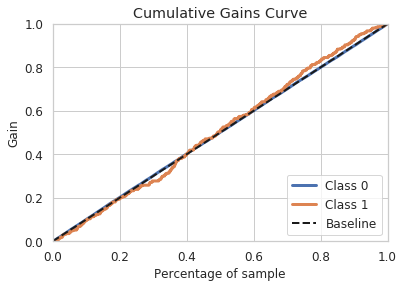

In [60]:
# Menggunakan scikitplot untuk membuat gain-life chart

# Install library scikiplot terlebih dahulu, dengan: pip install scikit-plot

import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_train, predicted_proba)
plt.show()

## 5.5.1 Komogorov-Smimov Penjelasan dan Coding

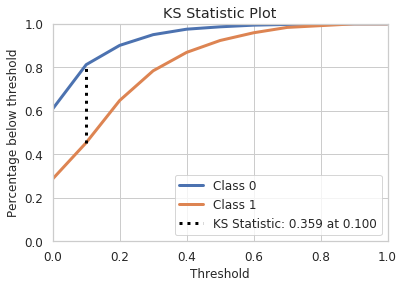

In [59]:
# K-S stats

# Install library scikiplot terlebih dahulu, dengan: pip install scikit-plot

import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_ks_statistic(y_test, predicted_proba)
plt.show()

## 5.6.2 AUC-ROC Gini Coding

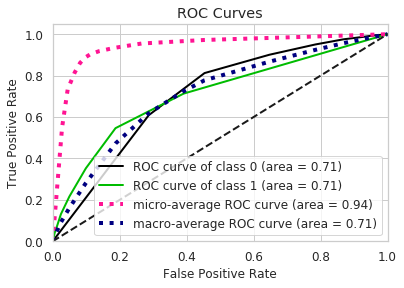

In [61]:
# kembali menggunakan library scikitplot
import scikitplot as skplt

# Membuat chart ROC dan menghitung AUC
skplt.metrics.plot_roc(y_test, predicted_proba)

plt.show()